<a href="https://colab.research.google.com/github/diamantidisgeorgios/exercise8/blob/main/Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unziping data

In [6]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

#Import libraries

In [2]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split

#Create class names according to the folder they belong to

In [7]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

#Load images, change their size and get their class

In [8]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

#Show images of the breeds

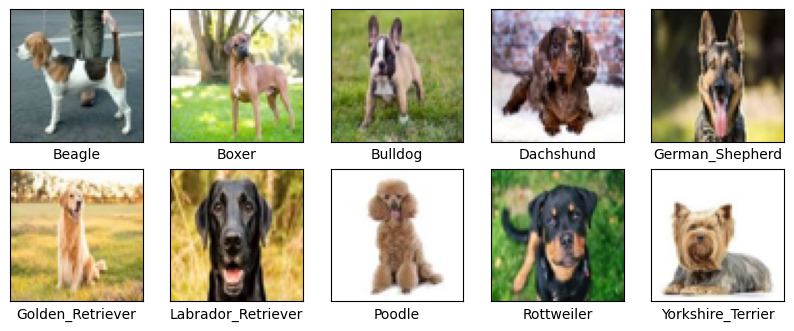

In [9]:
ls = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 0;
plt.figure(figsize=(10,10))

while ls:
    if targets[i] in ls:
      plt.subplot(5,5,targets[i]+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(inputs[i].astype('uint8'))
      plt.xlabel(class_names[targets[i]])
      ls.remove(targets[i])
    i += 1
plt.show()


#Split to train and test set with stratify

In [10]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=test_size,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

#Normalize images from 0.0 to 1.0

In [11]:
x_train /= 255.0
x_test /= 255.0

#One hot encode the targets to use softmax at the end

In [12]:
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

#Set seed for reproducibility

In [13]:
seed = 0

tf.random.set_seed(seed=seed)

#Create the MLP model

In [19]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=256, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,457,482 (24.63 MB)

 Trainable params: 6,457,482 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

In the model the input nodes are the the flattened image size (64*64*3 = 12288 nodes) and the output nodes are 10, which is the number of breeds in the dataset. The first dense layers has 512 neurons, the second has 256 and the third has 128. All the dense nodes have ReLu as an activation function except the last one which is the output nodes, which have a softmax function.

#Train the model

The model will be train with the following
*   Optimizer: Adam
*   Learning Rate: 0.001
*   Loss Function: Categorical Cross-Entropy
*   Batch Size: 32
*   Epochs: 30


In [20]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.1038 - loss: 6.7727 - val_accuracy: 0.1443 - val_loss: 2.7994
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.1470 - loss: 2.5261 - val_accuracy: 0.2371 - val_loss: 2.2517
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2622 - loss: 2.1173 - val_accuracy: 0.2165 - val_loss: 2.2070
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3167 - loss: 2.0230 - val_accuracy: 0.3024 - val_loss: 2.0662
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3715 - loss: 1.8867 - val_accuracy: 0.3265 - val_loss: 1.7688
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.4707 - loss: 1.5805 - val_accuracy: 0.3746 - val_loss: 1.7161
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.5648 - loss: 1.4082 - val_accuracy: 0.4983 - val_loss: 1.4850
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.6369 - loss: 1.2058 - val_accuracy: 0.5258

#Plot loss histrory and accuracy history for the train and test

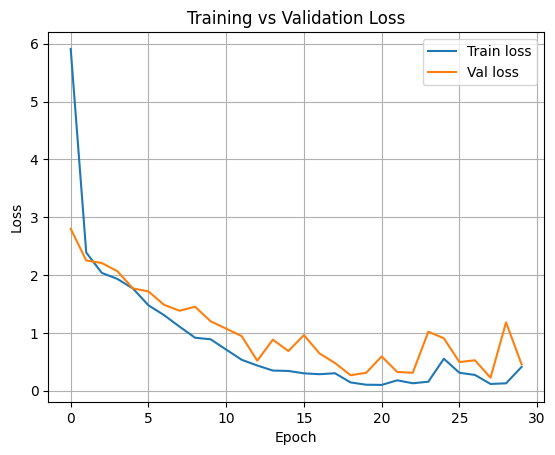

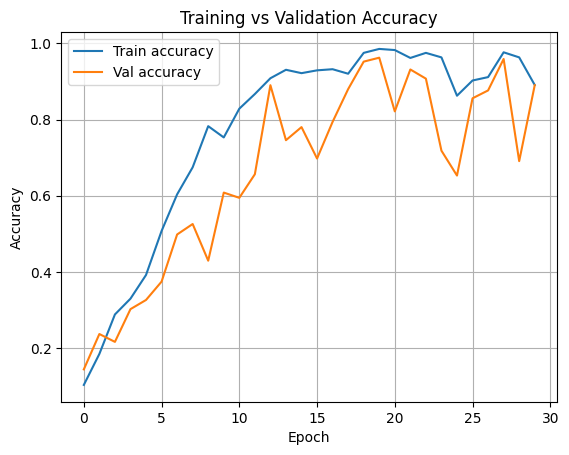

In [22]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Create the CNN model

In [30]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
    ], name='CNN')
cnn.summary()


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 58, 58, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    27,558,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,582,890 (105.22 MB)

 Trainable params: 27,582,890 (105.22 MB)

 Non-trainable params: 0 (0.00 B)

#Train the CNN model with the same parameters as the MLP model

In [31]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1241 - loss: 5.2361 - val_accuracy: 0.5739 - val_loss: 1.7510
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6811 - loss: 1.2870 - val_accuracy: 0.9072 - val_loss: 0.4956
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9645 - loss: 0.1804 - val_accuracy: 0.9622 - val_loss: 0.1811
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9944 - loss: 0.0278 - val_accuracy: 0.9897 - val_loss: 0.1358
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9759 - val_loss: 0.1743
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 3.6419e-04 - val_accuracy: 0.9759 - val_loss: 0.1866
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 1.9212e-04 - val_accuracy: 0.9759 - val_loss: 0.1895
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 1.2180e-04 - val_accuracy: 0.9759

#Plot the CNN loss histrory and accuracy history for the train and test

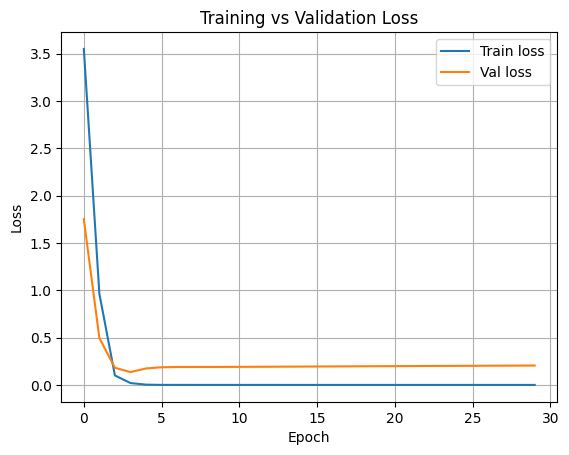

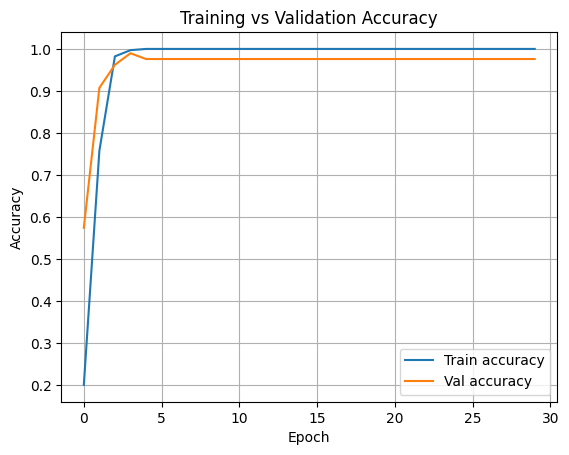

In [32]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The cnn model is better than the simple MLP model. This is because the cnn model applies filters at the image so it can extract some relavant infromation, or features. Using the filters, the model learns the abstractions of the image like for e.g. the edges. Therefore, it is preferable to use a cnn than a mlp for image classification, since it can learn the needed filter to do a better job at classification.

#Trying again the model but with batch normalization at every layer

In [33]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
    ], name='CNN')
cnn.summary()


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 58, 58, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 58, 58, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │    27,558,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,583,850 (105.22 MB)

 Trainable params: 27,583,370 (105.22 MB)

 Non-trainable params: 480 (1.88 KB)

In [34]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4334 - loss: 2.3139 - val_accuracy: 0.2234 - val_loss: 2.1987
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9890 - loss: 0.1749 - val_accuracy: 0.1718 - val_loss: 2.3070
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0478 - val_accuracy: 0.1443 - val_loss: 2.3796
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 1.0000 - loss: 0.0228 - val_accuracy: 0.1718 - val_loss: 2.4393
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.2509 - val_loss: 2.4873
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.2784 - val_loss: 2.5108
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.3058 - val_loss: 2.5086
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.3127 - val_loss:

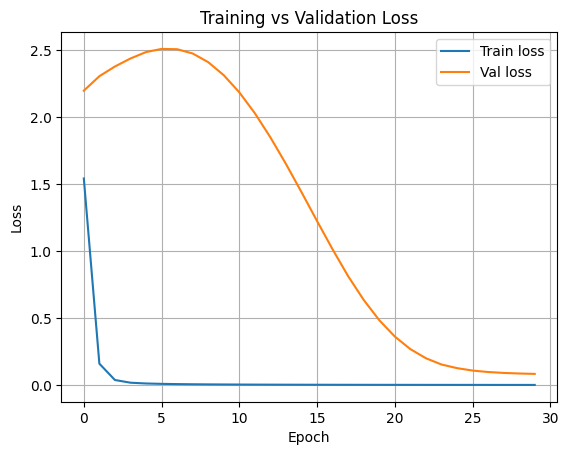

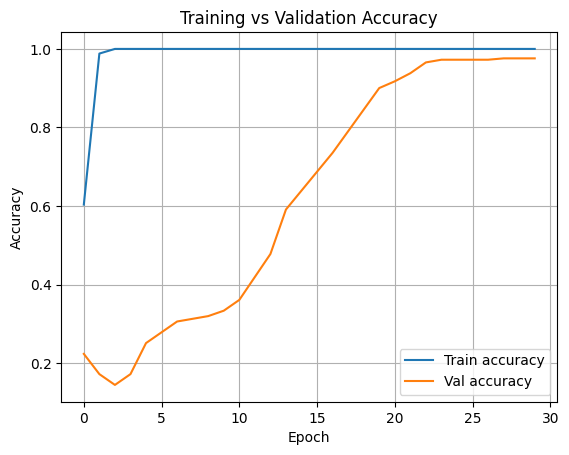

In [35]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

At first, doing a batch normalization after every layer, the model overfitted on the data, but after a while, the test accuracy started to converge to the train accuracy.